In [1]:
# Import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Load Data

In [2]:
# Open dataset
df_irrigation = pd.read_csv('./datasets/irrigation_data.csv')

In [3]:
# Check Dataset structure
df_irrigation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Irrigation Hours         299 non-null    int64  
 1   Irrigation Area          299 non-null    int64  
 2   Irrigated Area by Angle  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [4]:
# Show DF top
df_irrigation.head(10)

,Irrigation Hours,Irrigation Area,Irrigated Area by Angle
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [5]:
# Show DF bottom
df_irrigation.tail(10)

,Irrigation Hours,Irrigation Area,Irrigated Area by Angle
289,290,29000,19333.333333
290,291,29100,19400.000000
291,292,29200,19466.666667
292,293,29300,19533.333333
293,294,29400,19600.000000
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


### EDA

In [6]:
# Show DF statistics
df_irrigation.describe()

,Irrigation Hours,Irrigation Area,Irrigated Area by Angle
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


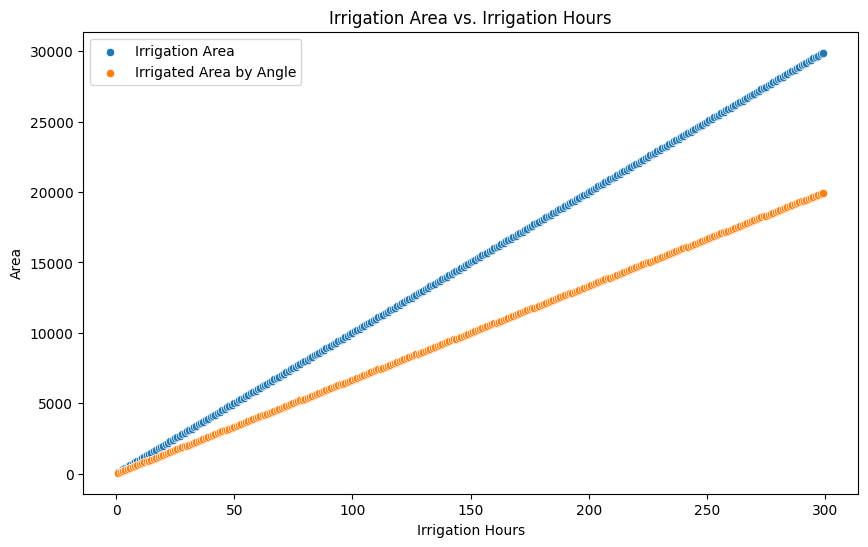

In [7]:
# Dispersal Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Irrigation Hours", y="Irrigation Area", data=df_irrigation, label="Irrigation Area")
sns.scatterplot(x="Irrigation Hours", y="Irrigated Area by Angle", data=df_irrigation, label="Irrigated Area by Angle")
plt.title("Irrigation Area vs. Irrigation Hours")
plt.xlabel("Irrigation Hours")
plt.ylabel("Area")
plt.legend()
plt.show()

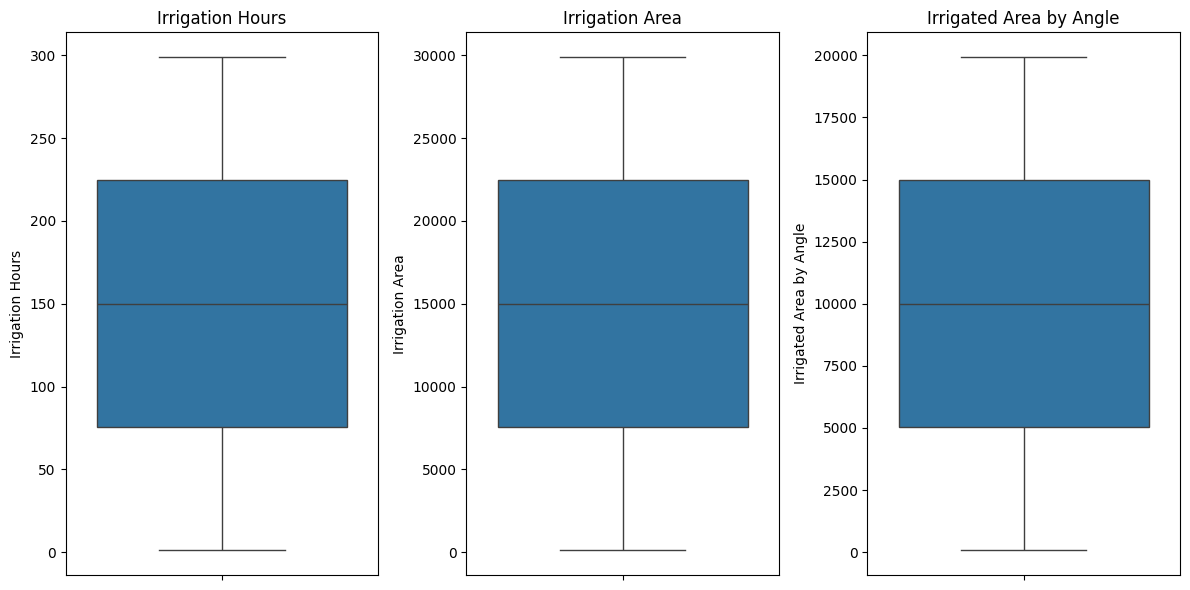

In [11]:
# Verify if we have outliers
# BoxPlot
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='Irrigation Hours', data=df_irrigation)
plt.title('Irrigation Hours')

plt.subplot(1, 3, 2)
sns.boxplot(y='Irrigation Area', data=df_irrigation)
plt.title('Irrigation Area')

plt.subplot(1, 3, 3)
sns.boxplot(y='Irrigated Area by Angle', data=df_irrigation)
plt.title('Irrigated Area by Angle')

plt.tight_layout()
plt.show()

<Axes: >

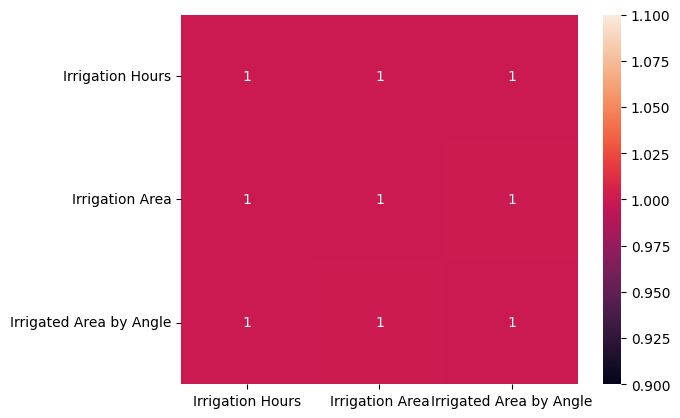

In [12]:
# Verify Correlation – Pearson
sns.heatmap(df_irrigation.corr('pearson'), annot=True)

<Axes: >

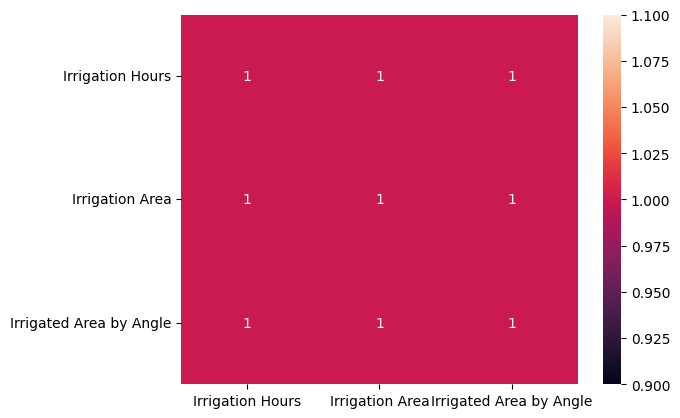

In [13]:
# Verify Correlation – Spearman
sns.heatmap(df_irrigation.corr('spearman'), annot=True)

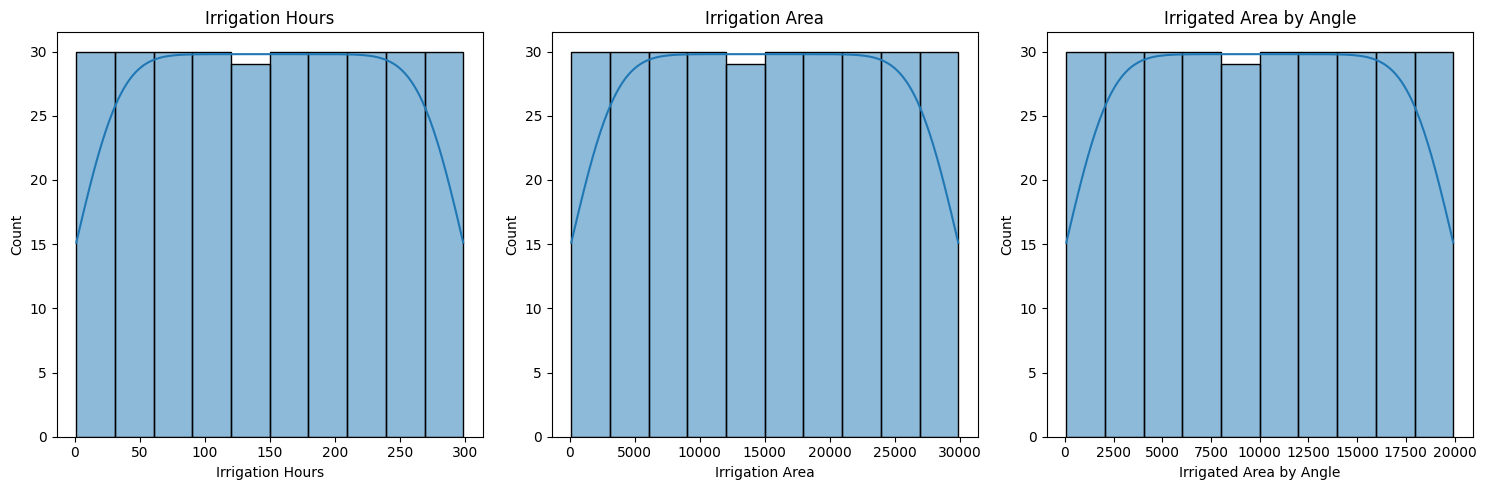

In [17]:
# Histograms

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_irrigation['Irrigation Hours'], kde=True)
plt.title('Irrigation Hours')

plt.subplot(1, 3, 2)
sns.histplot(df_irrigation['Irrigation Area'], kde=True)
plt.title('Irrigation Area')

plt.subplot(1, 3, 3)
sns.histplot(df_irrigation['Irrigated Area by Angle'], kde=True)
plt.title('Irrigated Area by Angle')

plt.tight_layout()
plt.show()

## Train Model

In [18]:
# Separate data into X and y
# Let's reshape the independent Irrigation Hours feature and the dependent Irrigated Area by Angle feature.
X = df_irrigation['Irrigation Hours'].values.reshape(-1, 1)
y = df_irrigation['Irrigated Area by Angle'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [19]:
# Instantiate the model to be trained
reg_model = LinearRegression()

In [20]:
# Train model
reg_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Line equation
# y = aX + b
print("Line equation is = {}x + {}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

Line equation is = 66.66666666666666x + 0.0


### Validate Model – Metrics

In [24]:
# Predict values based on test data
y_pred = reg_model.predict(X_test)

In [25]:
# Calculate the R-squared or Coefficient of Determination
# R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2_score(y_test, y_pred)

1.0

In [26]:
# Calculate the MAE (Mean Absolute Error)
# MAE = Average (|y_test - y_pred|)
# The lower the MAE, the better the model
# It is easy to interpret
# MAE is less sensitive to outliers
mean_absolute_error(y_test, y_pred)

1.3272938303998672e-12

In [27]:
# Calculate the MSE (Mean Squared Error)
# MSE = Average (y_test - y_pred)^2
# The lower the MSE, the better the model
# It is harder to interpret than MAE
# MSE is more sensitive to outliers and penalizes larger errors
mean_squared_error(y_test, y_pred)

3.1080036997941056e-24

In [28]:
# Calculate the RMSE (Squared Root Mean Squared Error)
# RMSE = Average (y_test - y_pred)^2
# The lower the MSE, the better the model
# It is easier to interpret than MSE
# RMSE is more sensitive to outliers and penalizes larger errors
root_mean_squared_error(y_test, y_pred)

1.7629531190006459e-12

<Axes: >

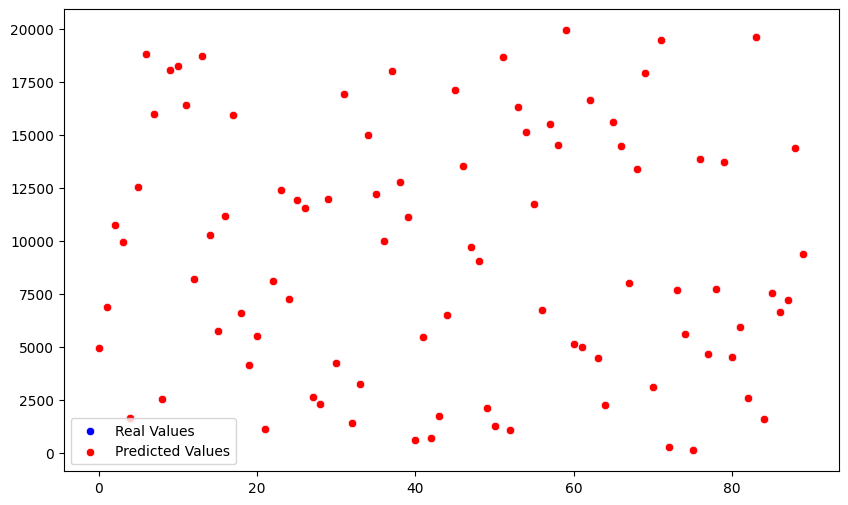

In [29]:
# Graphical Analysis
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Real Values')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Predicted Values')

### Residue Analysis

In [30]:
# Calculate residuals
residuals = y_test - y_pred

In [31]:
# Calculate the default residuals (standardization)
# For each element from the residuals (X - average) / standard_deviation
from scipy.stats import zscore
residuals_std = zscore(residuals)

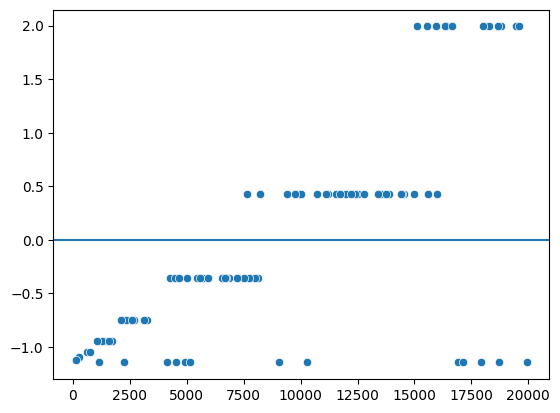

In [32]:
# Verify model linearity
# If the residuals are balanced around -2 and 2, the model is linear

# Verify homogeneity of variance (homoscedasticity)
# If values are balance around the line, the model is homoscedastic
# if we have a tendency or pattern (forming a cone, funnel), the model is heteroscedastic

sns.scatterplot(x=y_pred.reshape(-1), y=residuals_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Residuals in Standard Deviation')

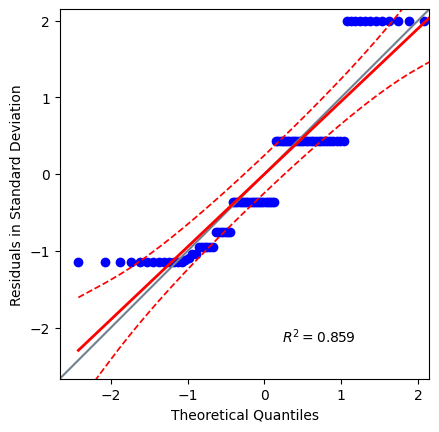

In [33]:
# Check if the residuals are normally distributed
# QQ (Quantile-Quantile) Plot, which evaluates if a sample follows a distribution
# normal
import pingouin as pg
pg.qqplot(residuals_std, dist='norm', confidence=0.95)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals in Standard Deviation')

In [34]:
# Normality Test – Shapiro-Wilk
# H0 – The sample has a normal distribution
# H1 – The sample does not have a normal distribution
# If p-value > 0.05, we fail to reject H0
# If p-value < 0.05, we reject H0
stat_shapiro, p_value_shapiro = shapiro(residuals.reshape(-1))
print("Shapiro-Wilk Test: {} and P-Value: {}".format(stat_shapiro, p_value_shapiro))

Shapiro-Wilk Test: 0.8493787607407111 and P-Value: 4.024114882918386e-08


In [35]:
# Normality Test – Kolmogorov-Smirnov
# H0 – The sample has a normal distribution
# H1 – The sample does not have a normal distribution
# If p-value > 0.05, we fail to reject H0
# If p-value < 0.05, we reject H0
stat_ks, p_value_ks = kstest(residuals.reshape(-1), 'norm')
print("Shapiro-Wilk Test: {} and P-Value: {}".format(stat_ks, p_value_ks))

Shapiro-Wilk Test: 0.5 and P-Value: 2.4869515015725988e-21


### Make predictions with the model

In [38]:
# If the soil is irrigated for 15 hours, what's the irrigated area by angle?
hours = 15
area_irrigated_by_angle = reg_model.predict([[hours]])
print("If we irrigate the soil for {} hours, we can irrigate an area of {} square meters".format(hours, area_irrigated_by_angle[0][0]))

If we irrigate the soil for 15 hours, we can irrigate an area of 999.9999999999999 square meters


## Save model to use later

In [39]:
import joblib
joblib.dump(reg_model, './reg_model.pkl')

['./reg_model.pkl']